In [24]:
from pangaeapy import PanDataSet
import pandas as pd
from matplotlib import pyplot as plt

def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

#N
ds1 = PanDataSet(900972)
ds1.data['Source']='N'
#C
ds2 = PanDataSet(900971)
ds2.data['Source']='C'
#C
ds3=PanDataSet(900967)
ds3.data['Source']='C'
#N
ds4=PanDataSet(900968)
ds4.data['Source']='N'
dsC=pd.merge(ds2.data,ds3.data,left_on='Depth',right_on='Depth',suffixes=('', '_y'))
drop_y(dsC)

dsN=pd.merge(ds1.data,ds4.data,left_on='Depth',right_on='Depth',suffixes=('', '_y'))
drop_y(dsN)
#ds3.data['Corg']=
dsC.columns

Index(['Depth', 'Age', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO',
       'Na2O', 'K2O', 'P2O5', 'SO3', 'Cl', 'LOI', 'Sum', 'Ba', 'Co', 'Cr',
       'Cu', 'Ga', 'Nb', 'Ni', 'Rb', 'Sr', 'Th', 'V', 'Y', 'Zn', 'Zr',
       'Latitude', 'Longitude', 'Elevation', 'Event', 'Date/Time', 'Source',
       'TOC', 'TN', 'CaCO3', 'δ15N', 'δ15N std dev', 'δ13C carb',
       'δ13C std dev', 'δ18O carb', 'δ18O std dev'],
      dtype='object')

In [50]:
dsdata=pd.concat([dsN,dsC])
dsdata = dsdata.reset_index(drop=True)

In [51]:
dsdata.columns

Index(['Depth', 'Age', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO',
       'Na2O', 'K2O', 'P2O5', 'SO3', 'Cl', 'LOI', 'Sum', 'Ba', 'Co', 'Cr',
       'Cu', 'Ga', 'Nb', 'Ni', 'Rb', 'Sr', 'Th', 'V', 'Y', 'Zn', 'Zr',
       'Latitude', 'Longitude', 'Elevation', 'Event', 'Date/Time', 'Source',
       'TOC', 'TN', 'CaCO3', 'δ15N', 'δ15N std dev', 'δ13C carb',
       'δ13C std dev', 'δ18O carb', 'δ18O std dev'],
      dtype='object')

In [52]:
# 1) the dataset has data expressed in % as well as in mg/kg, we therefore need to clean the data first
#    in order to have the same units here. We recalculate % to mg/kg with a factor of 10000
# 2) oxides need to be converted to elementt weights
oxide={'SiO2':2.1392, 'TiO2':1.6681, 'Al2O3':1.8895, 'Fe2O3':1.4297, 'MnO':1.2912, 'MgO':1.6582, 'CaO':1.3992,
       'Na2O':1.3480, 'K2O':1.2046, 'P2O5':2.2916, 'SO3':2.4972}
for pshort,param in ds1.params.items():
    if pshort in oxide:
        dsdata[pshort]=dsdata[pshort].divide(oxide[pshort])
    if param.unit=='mg/kg':
        dsdata[pshort]=dsdata[pshort].divide(10000)


In [53]:
dsdata.tail()

,Depth,Age,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,...,Source,TOC,TN,CaCO3,δ15N,δ15N std dev,δ13C carb,δ13C std dev,δ18O carb,δ18O std dev
48,2.375,2.867,19.848542,0.392063,6.917174,3.839966,0.043371,2.074539,8.004574,1.446588,...,C,1.89,0.23,19.1,8.09,0.06,-0.71,0.03,-3.11,0.04
49,4.390,6.666,21.741773,0.419639,7.144747,3.937889,0.051115,2.104692,7.404231,1.283383,...,C,1.01,0.15,19.4,6.84,0.03,-1.91,0.03,-4.69,0.04
50,6.855,10.703,22.190539,0.435226,7.912146,4.364552,0.055762,2.309733,6.009863,1.275964,...,C,0.42,0.08,15.6,6.66,0.00,-2.11,0.03,-5.05,0.04
51,6.865,10.707,22.405572,0.444218,7.970363,4.350563,0.056537,2.315764,5.889794,1.261128,...,C,0.41,0.09,15.0,6.84,0.04,-2.02,0.03,-4.95,0.04
52,6.875,10.716,22.143792,0.431029,7.790421,4.546408,0.056537,2.261488,6.129217,1.313056,...,C,0.45,0.09,15.9,6.98,0.00,-1.75,0.03,-4.74,0.04


In [54]:
#original data matrix also contains Cl, PCA can only be reproduced without Cl in matrix
#Probably because sample was treated with HCl?

elementcols=['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO',
             'Na2O', 'K2O', 'P2O5', 'SO3','Ba', 'Co', 'Cr', 'Cu', 
             'Ga', 'Nb', 'Ni', 'Rb', 'Sr', 'Th', 'V', 'Y', 'Zn', 'Zr','TOC']


#Ca, Corg, P, S, Sr and Zn 
#Al, Ba, Co, Cr, Cu, Fe, Ga, K, Mg, Mn, Nb, Ni, Rb, Si, Th, Ti, V, Y and Zr.

X=dsdata[elementcols].values
y = dsdata['Age'].values

In [55]:
X

array([[2.03440539e+01, 3.98057670e-01, 7.30351945e+00, ...,
        5.10000000e-03, 1.23000000e-02, 2.61000000e+00],
       [2.06432311e+01, 3.99256639e-01, 7.36173591e+00, ...,
        4.90000000e-03, 1.24000000e-02, 2.37000000e+00],
       [2.07227001e+01, 4.05850968e-01, 7.40936756e+00, ...,
        5.10000000e-03, 1.25000000e-02, 2.35000000e+00],
       ...,
       [2.21905385e+01, 4.35225706e-01, 7.91214607e+00, ...,
        6.70000000e-03, 1.33000000e-02, 4.20000000e-01],
       [2.24055722e+01, 4.44217973e-01, 7.97036253e+00, ...,
        6.70000000e-03, 1.29000000e-02, 4.10000000e-01],
       [2.21437921e+01, 4.31029315e-01, 7.79042075e+00, ...,
        6.60000000e-03, 1.29000000e-02, 4.50000000e-01]])

In [56]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
scaledX=StandardScaler().fit(X)
X_std = scaledX.transform(X)
sklearn_pca = sklearnPCA(n_components=2)
pcares = sklearn_pca.fit(X_std).transform(X_std)

In [75]:
komp=pd.DataFrame(sklearn_pca.components_).transpose()
komp=komp.rename(columns={0:'PC1',1:'PC2'})
komp['Element']=elementcols
komp['Element']=komp['Element'].str.extract(r'([A-Z][a-z]?)')
komp.head()

,PC1,PC2,Element
0,0.231235,0.195818,Si
1,0.289454,-0.021371,Ti
2,0.287417,-0.065147,Al
3,0.230098,-0.147079,Fe
4,0.204052,0.270933,Mn


In [77]:
pcaresf=pd.DataFrame(pcares)
dsdata['PCA1']=pcaresf[0]
dsdata['PCA2']=pcaresf[1]

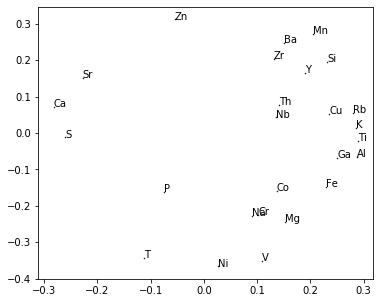

In [78]:
fig = plt.figure(figsize = (6,5))
plt.plot(komp['PC1'],komp['PC2'], '.',color='k', label=komp['Element'],markersize=1)
for i, p in komp.iterrows():
        plt.text(p['PC1'], p['PC2'], str(p['Element']),fontsize=10)

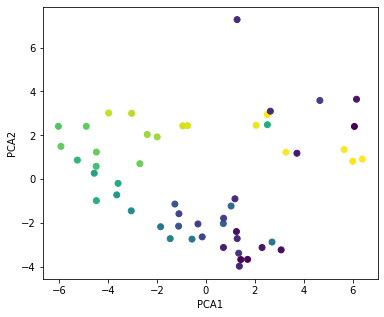

In [71]:
fig = plt.figure(figsize = (6,5))
plt.scatter(dsdata['PCA1'],dsdata['PCA2'], c=dsdata['Age'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()